In [1]:
from keras.datasets import mnist

In [2]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [3]:
print('X_train: ' + str(X_train.shape))
print('y_train: ' + str(y_train.shape))
print('X_test:  '  + str(X_test.shape))
print('y_test:  '  + str(y_test.shape))

X_train: (60000, 28, 28)
y_train: (60000,)
X_test:  (10000, 28, 28)
y_test:  (10000,)


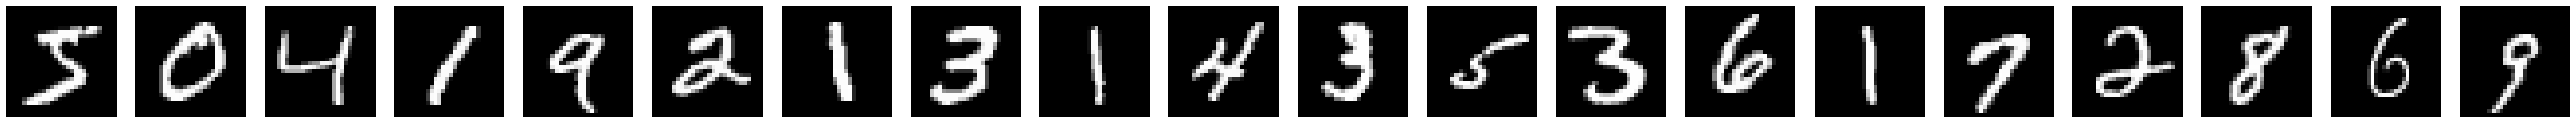

In [4]:
from matplotlib import pyplot as plt
num_images = 20 # Adjust this number as needed

fig, axes = plt.subplots(1, num_images, figsize=(num_images * 2, 2))

for i in range(num_images):
    axes[i].imshow(X_train[i], cmap='gray')
    axes[i].axis('off')
plt.tight_layout()
plt.show()

In [5]:
# Flatten the images from 28x28 to 784 features
X_train_flattened = X_train.reshape(X_train.shape[0], -1)
X_test_flattened = X_test.reshape(X_test.shape[0], -1)

In [6]:
y_train.shape

(60000,)

In [7]:
import pandas as pd
import numpy as np

In [8]:
df = pd.DataFrame((X_train_flattened))

In [115]:
df['label'] = y_train

In [116]:
df['label'].unique()

array([5, 0, 4, 1, 9, 2, 3, 6, 7, 8], dtype=uint8)

In [117]:
df.head(10)

,0,1,2,3,4,5,6,7,8,9,...,775,776,777,778,779,780,781,782,783,label
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,5
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,4
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,9
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2
6,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
7,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,3
8,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
9,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,4


In [118]:
describe = df.describe()
# describe[describe['mean'] == 0]
describe = describe.transpose()
drop_columns = describe[(describe['min'] == 0) & describe['max'] == 0]
drop_columns

,count,mean,std,min,25%,50%,75%,max
0,60000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,60000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,60000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,60000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,60000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...
759,60000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
780,60000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
781,60000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
782,60000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [119]:
drop_columns = drop_columns.transpose()
drop_columns

,0,1,2,3,4,5,6,7,8,9,...,754,755,756,757,758,759,780,781,782,783
count,60000.0,60000.0,60000.0,60000.0,60000.0,60000.0,60000.0,60000.0,60000.0,60000.0,...,60000.0,60000.0,60000.0,60000.0,60000.0,60000.0,60000.0,60000.0,60000.0,60000.0
mean,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
std,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
min,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
25%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
50%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
75%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
max,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [120]:
clean_df = df.drop(columns=drop_columns.columns, axis=1)
clean_df

,12,13,14,15,32,33,34,35,36,37,...,771,772,773,774,775,776,777,778,779,label
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,5
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,4
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,8
59996,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,3
59997,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,5
59998,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,6


In [121]:
import seaborn as sns

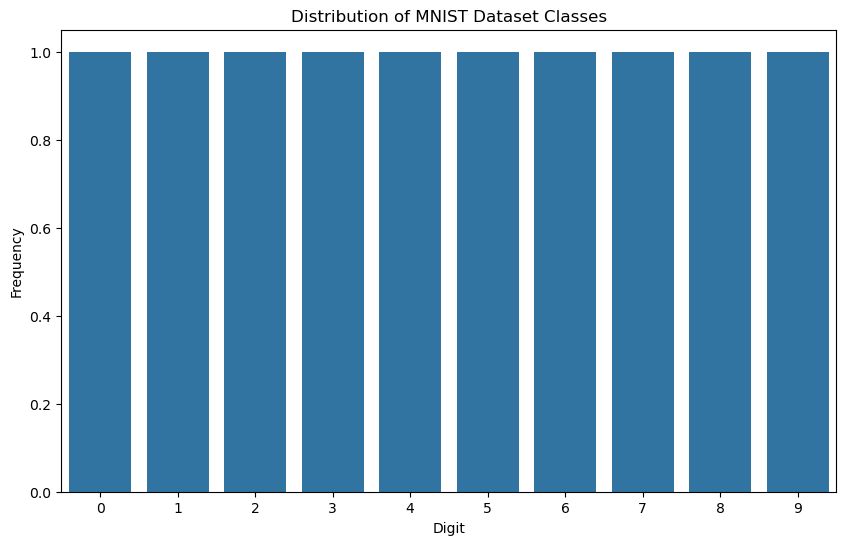

In [122]:
plt.figure(figsize=(10, 6))
sns.countplot(clean_df['label'][:10])
plt.title('Distribution of MNIST Dataset Classes')
plt.xlabel('Digit')
plt.ylabel('Frequency')
plt.show()

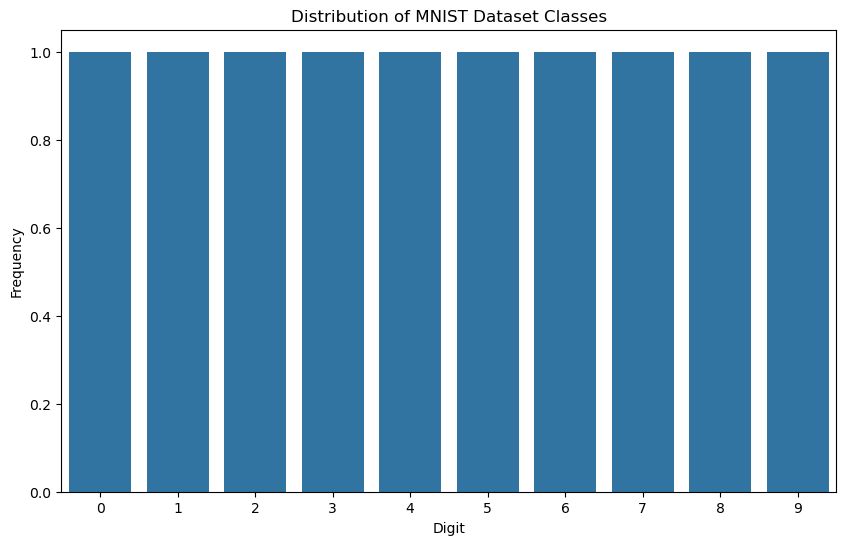

In [123]:
plt.figure(figsize=(10, 6))
sns.countplot(clean_df['label'].unique())
plt.title('Distribution of MNIST Dataset Classes')
plt.xlabel('Digit')
plt.ylabel('Frequency')
plt.show()

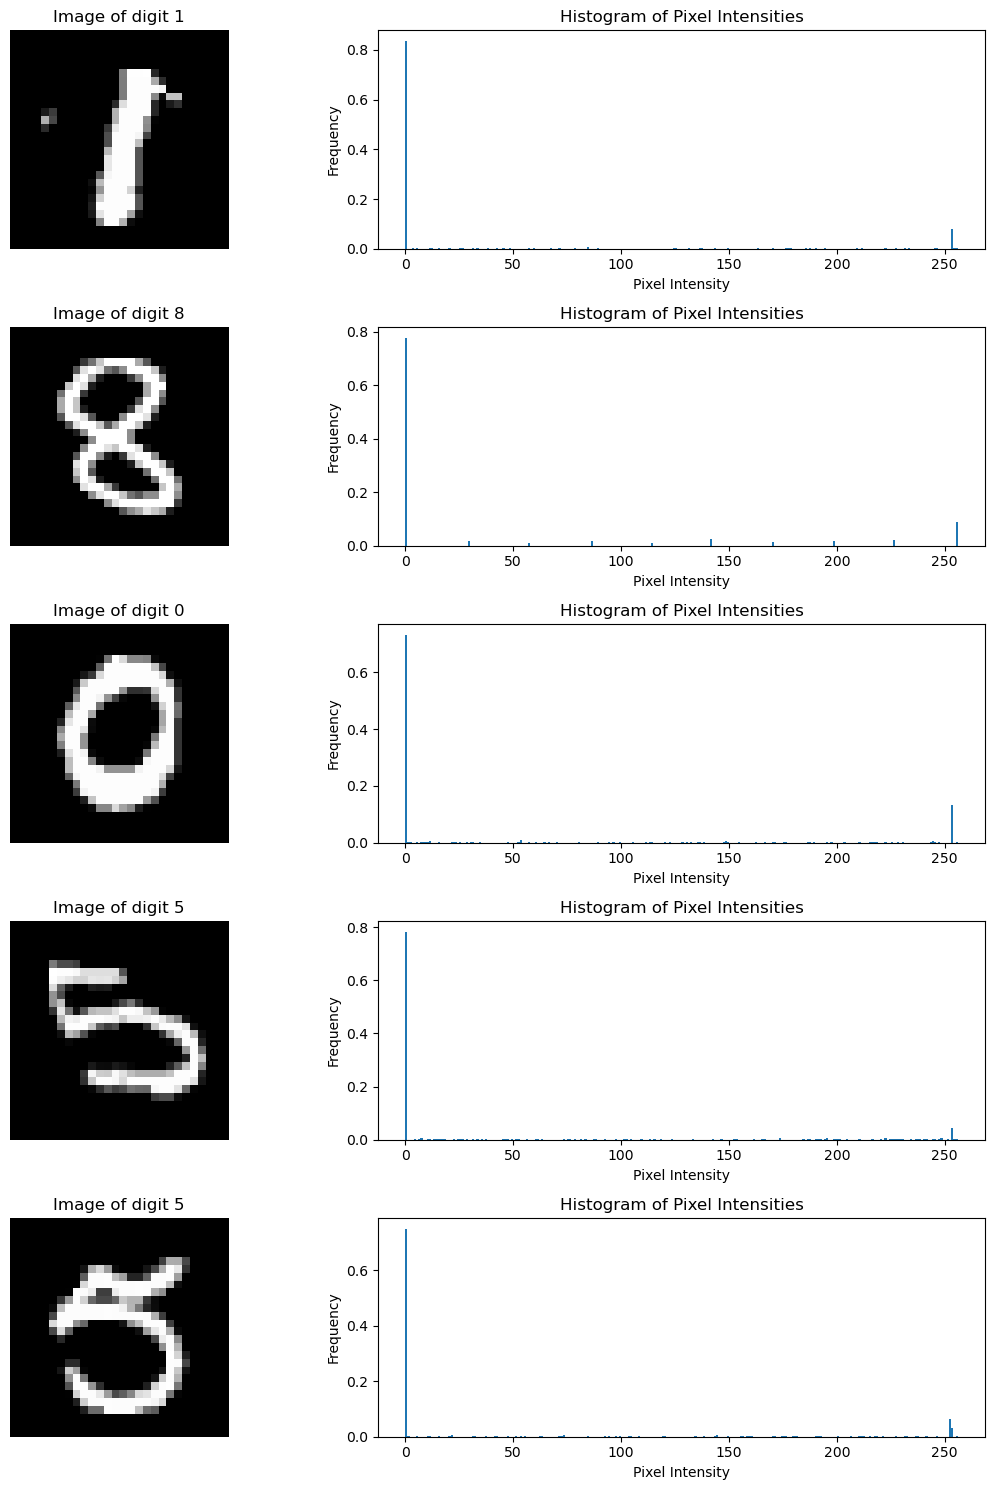

In [124]:
def plot_histogram(image, ax):
    ax.hist(image.ravel(), bins=256, range=(0, 256), density=True)
    ax.set_xlabel('Pixel Intensity')
    ax.set_ylabel('Frequency')
    ax.set_title('Histogram of Pixel Intensities')

num_samples = 5 # Number of sample images to plot
sample_indices = np.random.choice(len(X_train), num_samples, replace=False)

# Plot the sample images and their histograms
fig, axes = plt.subplots(num_samples, 2, figsize=(12, 15))

for i, idx in enumerate(sample_indices):
    # Plot the sample image
    ax_img = axes[i, 0]
    ax_img.imshow(X_train[idx], cmap='gray')
    ax_img.axis('off')
    ax_img.set_title(f'Image of digit {y_train[idx]}')

    # Plot the histogram
    ax_hist = axes[i, 1]
    plot_histogram(X_train[idx], ax_hist)

plt.tight_layout()
plt.show()

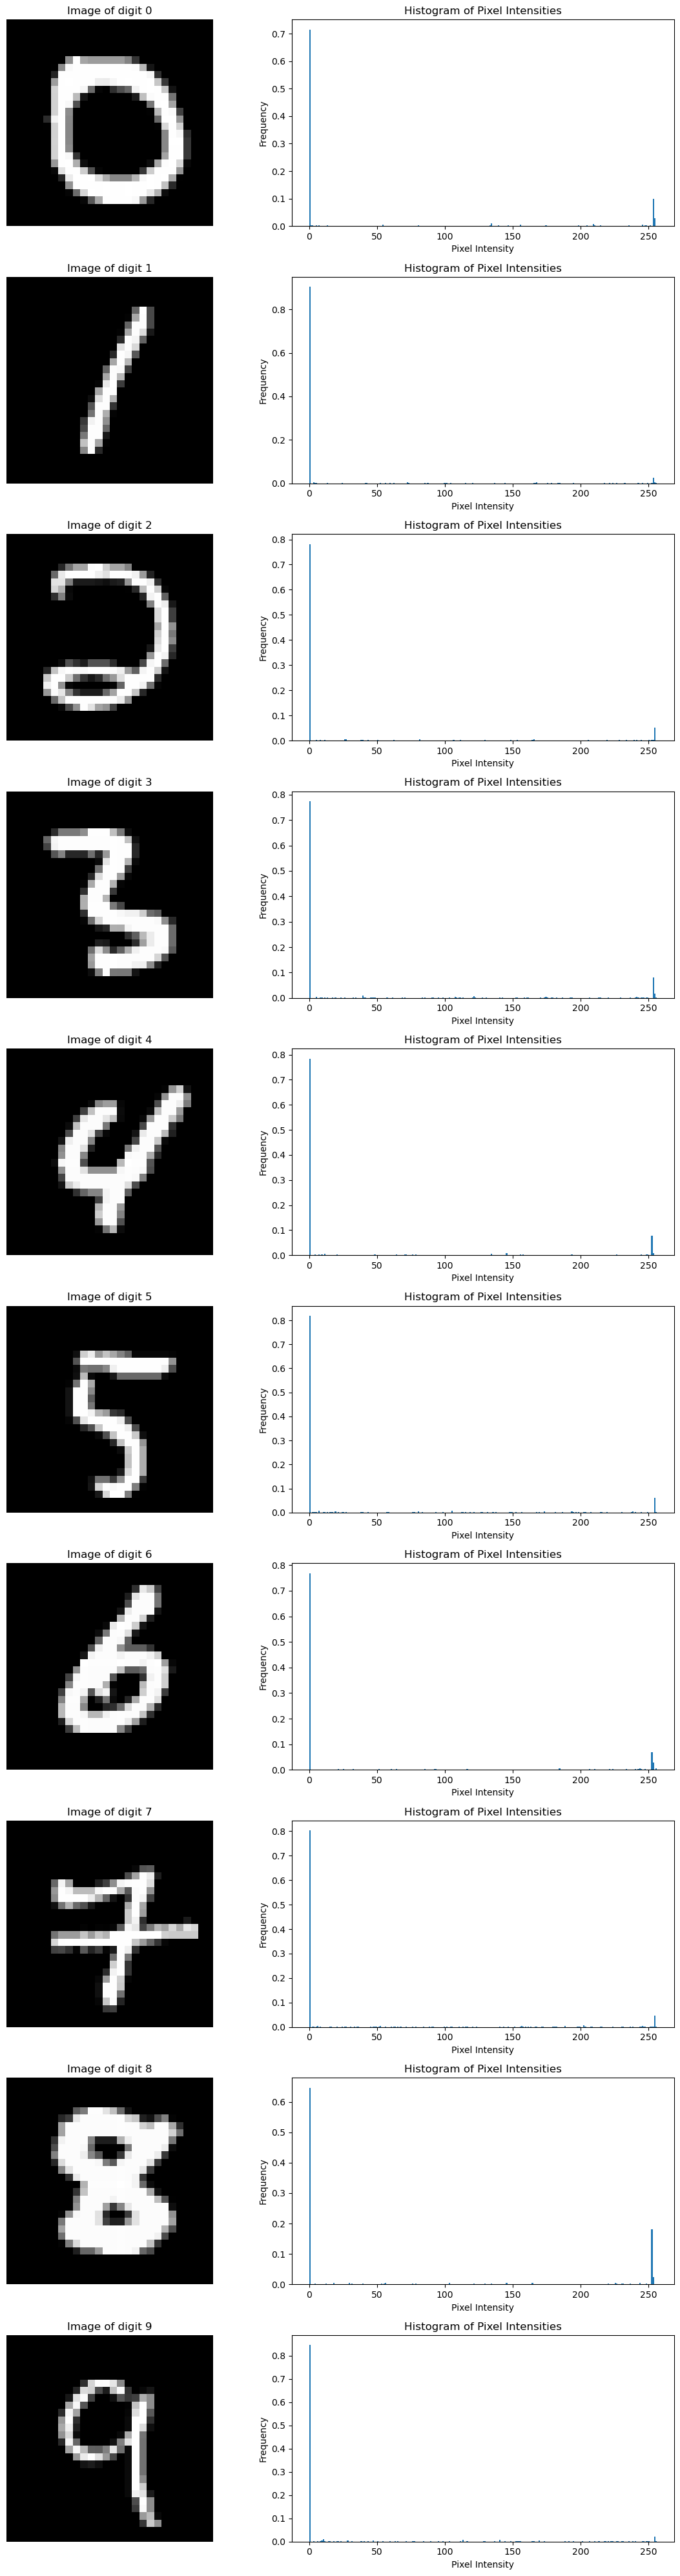

In [125]:

def plot_histogram(image, ax):
    ax.hist(image.ravel(), bins=256, range=(0, 256), density=True)
    ax.set_xlabel('Pixel Intensity')
    ax.set_ylabel('Frequency')
    ax.set_title('Histogram of Pixel Intensities')

# Number of unique classes (digits)
num_classes = len(np.unique(y_train))

# Select one random sample for each unique class
unique_indices = []
for cls in range(num_classes):
    cls_indices = np.where(y_train == cls)[0]
    unique_idx = np.random.choice(cls_indices, 1)[0]
    unique_indices.append(unique_idx)

# Plot the sample images and their histograms
fig, axes = plt.subplots(num_classes, 2, figsize=(12, 4 * num_classes))

for i, idx in enumerate(unique_indices):
    # Plot the sample image
    ax_img = axes[i, 0]
    ax_img.imshow(X_train[idx], cmap='gray')
    ax_img.axis('off')
    ax_img.set_title(f'Image of digit {y_train[idx]}')

    # Plot the histogram
    ax_hist = axes[i, 1]
    plot_histogram(X_train[idx], ax_hist)

plt.tight_layout()
plt.show()

In [11]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()

In [12]:
knn.fit(X_train_flattened, y_train)

KNeighborsClassifier()

In [13]:
y_pred = knn.predict(X_test_flattened)

In [14]:
from sklearn.metrics import classification_report, confusion_matrix

In [15]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.96      0.99      0.98       980
           1       0.95      1.00      0.98      1135
           2       0.98      0.96      0.97      1032
           3       0.96      0.97      0.97      1010
           4       0.98      0.96      0.97       982
           5       0.97      0.97      0.97       892
           6       0.98      0.99      0.98       958
           7       0.96      0.96      0.96      1028
           8       0.99      0.94      0.96       974
           9       0.96      0.95      0.95      1009

    accuracy                           0.97     10000
   macro avg       0.97      0.97      0.97     10000
weighted avg       0.97      0.97      0.97     10000



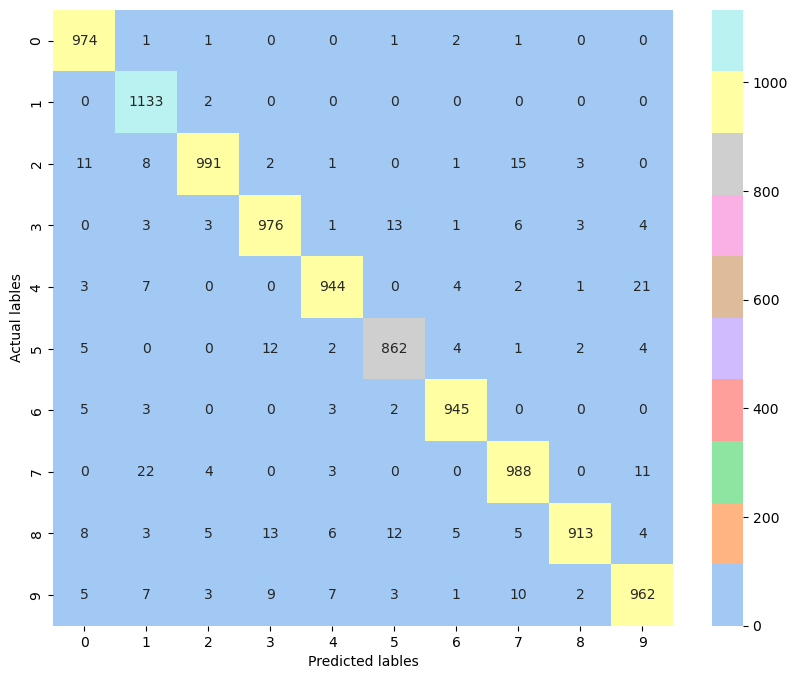

In [16]:
import seaborn as sns
plt.figure(figsize=(10,8))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, cmap=sns.color_palette('pastel'), fmt='.0f')
plt.xlabel('Predicted lables')
plt.ylabel('Actual lables')
plt.show()

In [17]:
from sklearn.model_selection import GridSearchCV

In [18]:
param_grid = {'n_neighbors': np.arange(1, 31)}
grid_search = GridSearchCV(KNeighborsClassifier(), param_grid, cv=10)
grid_search.fit(X_train_flattened, y_train)

In [1]:
print("Best K value:", grid_search.best_params_['n_neighbors'])

NameError: name 'grid_search' is not defined

In [132]:
from scipy.stats import pearsonr

C:\Users\atuls\AppData\Local\Temp\ipykernel_5140\86934075.py:1: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  correlations = [pearsonr(X_train_flattened[:, i], y_train)[0] for i in range(X_train_flattened.shape[1])]


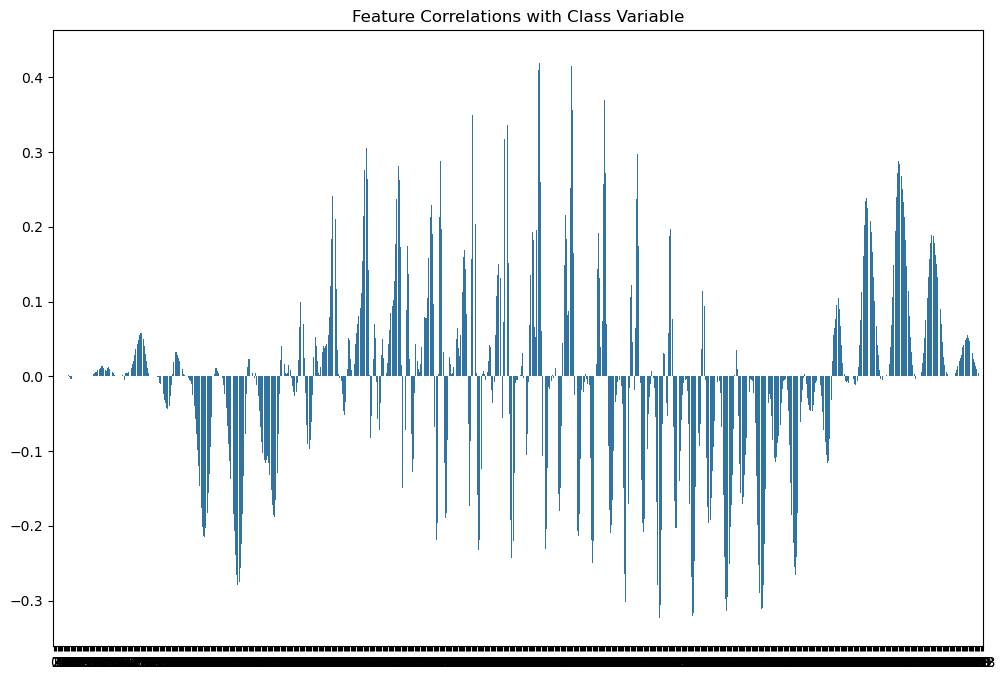

In [133]:
correlations = [pearsonr(X_train_flattened[:, i], y_train)[0] for i in range(X_train_flattened.shape[1])]
plt.figure(figsize=(12, 8))
sns.barplot(x=np.arange(len(correlations)), y=correlations)
plt.title('Feature Correlations with Class Variable')
plt.show()

In [134]:
for correlation in correlations:
    if correlation > 0:
        print(correlation)

0.00187871783801058
0.0021845985244983404
0.002520204629423698
0.00470862448694339
0.006026018376163409
0.005724298122122544
0.007848192199668903
0.010320998733252438
0.011771043657380008
0.01323576542047751
0.013707608739684378
0.010958270470403335
0.008626506648517974
0.007236473705542576
0.010812887874167525
0.011987687340064824
0.010256266807491645
0.00897503775596742
0.005884270062885265
0.004454722159659993
0.0023441560326658167
0.002184598524498338
0.004136016726813331
0.00414381500201487
0.004391601195081342
0.006355382853408083
0.007868989653641564
0.010486611356363577
0.01612816706483606
0.020927897528126266
0.028281851823881952
0.0363675459267469
0.04346498171938182
0.049104730208006785
0.05542917166984358
0.05825210875019241
0.05750662179461367
0.050198578430788315
0.04011938892450643
0.029652423379225877
0.020698320769413726
0.011251105442469699
0.004326531756798728
0.0007370374380191951
0.00043996562375218993
0.003384691519433568
0.019693368226411028
0.03201889893137227
0

In [135]:
# Visualize the feature importance using a bar plot (approximated by correlation values)
# Here, the features are pixel intensities, so we use their correlations
feature_importance = np.abs(correlations)
feature_importance = sorted(feature_importance, reverse=True)
feature_importance[:10]
# indices = np.argsort(feature_importance)[-10:]  # top 10 features

# plt.figure(figsize=(10, 8))
# plt.title('Top 10 Feature Importances')
# plt.barh(range(len(indices)), feature_importance[indices], color='b', align='center')
# plt.yticks(range(len(indices)), [f'pixel {i}' for i in indices])
# plt.xlabel('Relative Importance')
# plt.show()

[nan, nan, nan, nan, nan, nan, nan, nan, nan, nan]

In [136]:
np.random.seed(10)
random_weights = np.random.rand(784)

In [137]:
randomly_weighted_knn = KNeighborsClassifier(metric_params= {'w': random_weights})

In [138]:
randomly_weighted_knn

KNeighborsClassifier(metric_params={'w': array([0.77132064, 0.02075195, 0.63364823, 0.74880388, 0.49850701,
       0.22479665, 0.19806286, 0.76053071, 0.16911084, 0.08833981,
       0.68535982, 0.95339335, 0.00394827, 0.51219226, 0.81262096,
       0.61252607, 0.72175532, 0.29187607, 0.91777412, 0.71457578,
       0.54254437, 0.14217005, 0.37334076, 0.67413362, 0.44183317,
       0.43401399, 0.61776698, 0.5131...
       0.48306052, 0.94970976, 0.54970372, 0.52442621, 0.87358481,
       0.64672582, 0.32923077, 0.01044932, 0.13709541, 0.77031791,
       0.83306662, 0.66467966, 0.5755562 , 0.90844811, 0.71437515,
       0.48190002, 0.70738989, 0.63937292, 0.02493945, 0.80307407,
       0.74634872, 0.38706935, 0.58632098, 0.23635684, 0.98863021,
       0.58878233, 0.19907788, 0.99016774, 0.85310139, 0.34412103,
       0.65704104, 0.93306039, 0.55907635, 0.61710508])})

In [139]:
randomly_weighted_knn.fit(X_train_flattened, y_train)

KNeighborsClassifier(metric_params={'w': array([0.77132064, 0.02075195, 0.63364823, 0.74880388, 0.49850701,
       0.22479665, 0.19806286, 0.76053071, 0.16911084, 0.08833981,
       0.68535982, 0.95339335, 0.00394827, 0.51219226, 0.81262096,
       0.61252607, 0.72175532, 0.29187607, 0.91777412, 0.71457578,
       0.54254437, 0.14217005, 0.37334076, 0.67413362, 0.44183317,
       0.43401399, 0.61776698, 0.5131...
       0.48306052, 0.94970976, 0.54970372, 0.52442621, 0.87358481,
       0.64672582, 0.32923077, 0.01044932, 0.13709541, 0.77031791,
       0.83306662, 0.66467966, 0.5755562 , 0.90844811, 0.71437515,
       0.48190002, 0.70738989, 0.63937292, 0.02493945, 0.80307407,
       0.74634872, 0.38706935, 0.58632098, 0.23635684, 0.98863021,
       0.58878233, 0.19907788, 0.99016774, 0.85310139, 0.34412103,
       0.65704104, 0.93306039, 0.55907635, 0.61710508])})

In [140]:
y_pred = randomly_weighted_knn.predict(X_test_flattened)

In [141]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.97      0.99      0.98       980
           1       0.96      1.00      0.98      1135
           2       0.98      0.96      0.97      1032
           3       0.96      0.96      0.96      1010
           4       0.97      0.96      0.96       982
           5       0.96      0.97      0.96       892
           6       0.98      0.99      0.98       958
           7       0.96      0.96      0.96      1028
           8       0.99      0.93      0.96       974
           9       0.96      0.95      0.96      1009

    accuracy                           0.97     10000
   macro avg       0.97      0.97      0.97     10000
weighted avg       0.97      0.97      0.97     10000



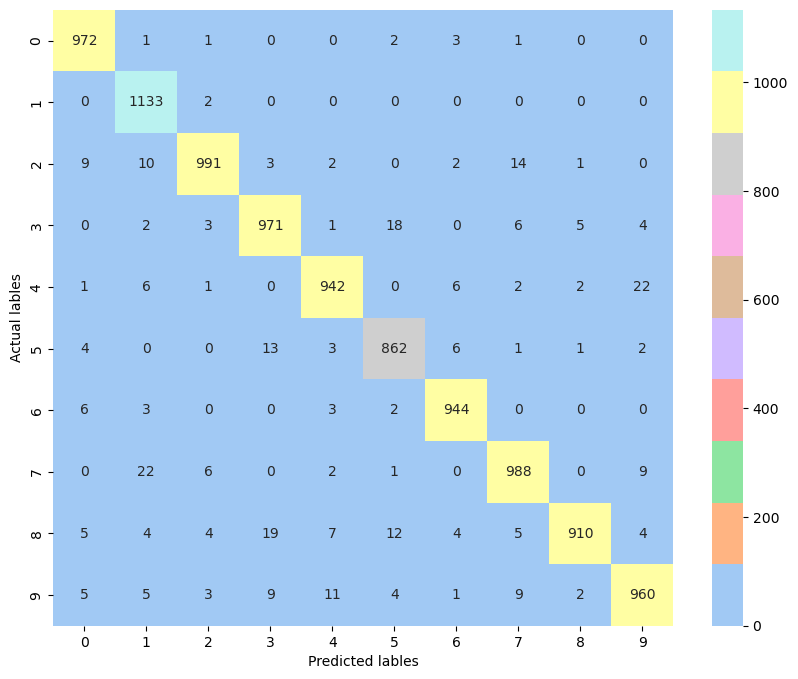

In [142]:
plt.figure(figsize=(10,8))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, cmap=sns.color_palette('pastel'), fmt='.0f')
plt.xlabel('Predicted lables')
plt.ylabel('Actual lables')
plt.show()